Primeros registros del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ K

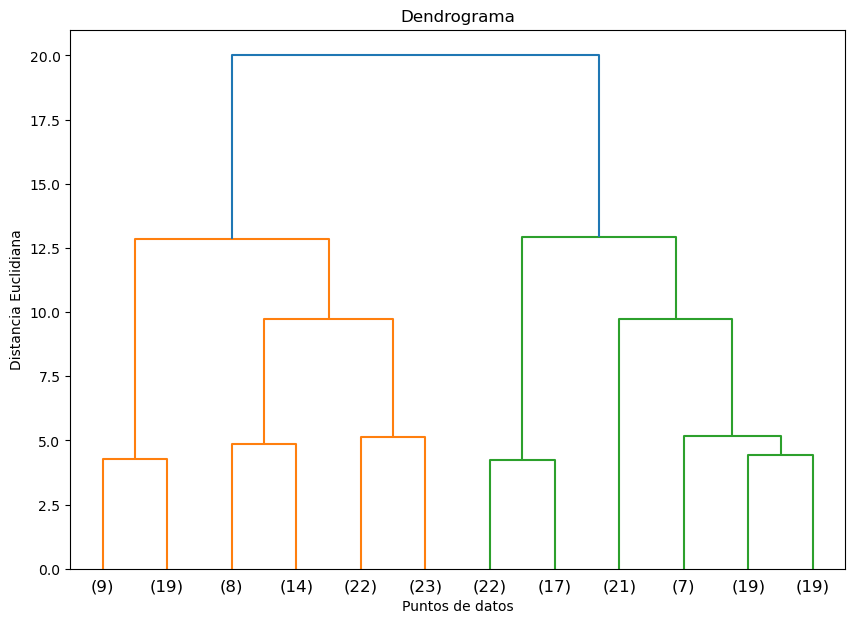

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529


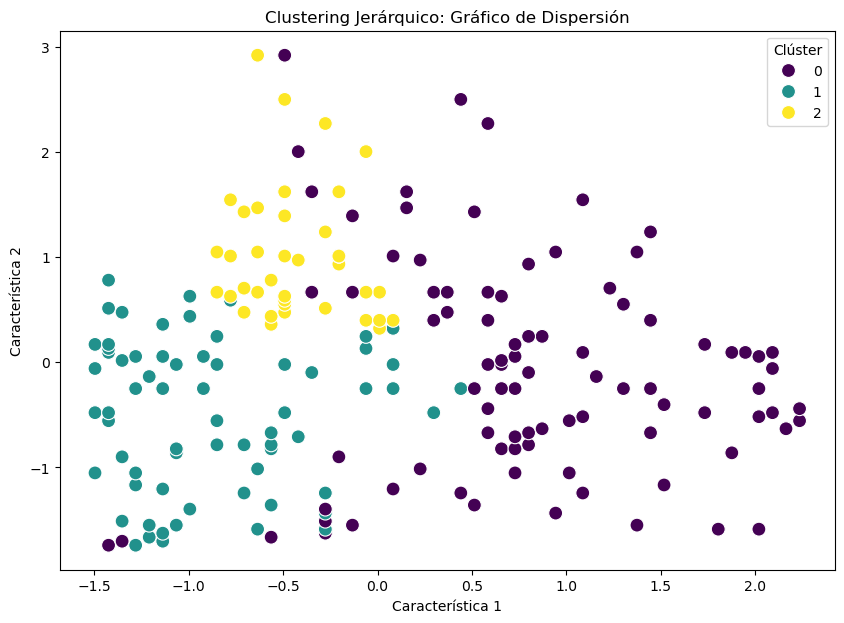

In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Paso 1: Configuración de la ruta y archivo
file_path = r'C:\Users\Mariano\Desktop\Analisis de datos\Tarea 4\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.xlsx'

# Cargar los datos
data = pd.read_excel(file_path)

# Paso 2: Análisis exploratorio de los datos
print("Primeros registros del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nDescripción estadística del dataset:")
print(data.describe())

# Paso 3: Limpieza y preprocesamiento de datos
# Eliminar filas con valores faltantes
data_cleaned = data.dropna()

# Seleccionar características relevantes para el clustering
# Suponiendo que las columnas relevantes son 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = data_cleaned[selected_features]

# Estandarización de las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Paso 4: Generar un dendrograma para decidir el número de clústeres
linked = linkage(features_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title("Dendrograma")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Paso 5: Entrenar el modelo de clustering jerárquico
# Seleccionamos el número de clústeres en base al dendrograma
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = hierarchical_clustering.fit_predict(features_scaled)

# Agregamos los clústeres al dataframe original
data_cleaned['Cluster'] = clusters

# Paso 6: Evaluación del modelo
silhouette_avg = silhouette_score(features_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(features_scaled, clusters)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Paso 7: Visualización de los resultados
# Gráfico de dispersión (usando las dos primeras características)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=features_scaled[:, 0], y=features_scaled[:, 1], 
    hue=clusters, palette="viridis", s=100
)
plt.title("Clustering Jerárquico: Gráfico de Dispersión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend(title='Clúster')
plt.show()
